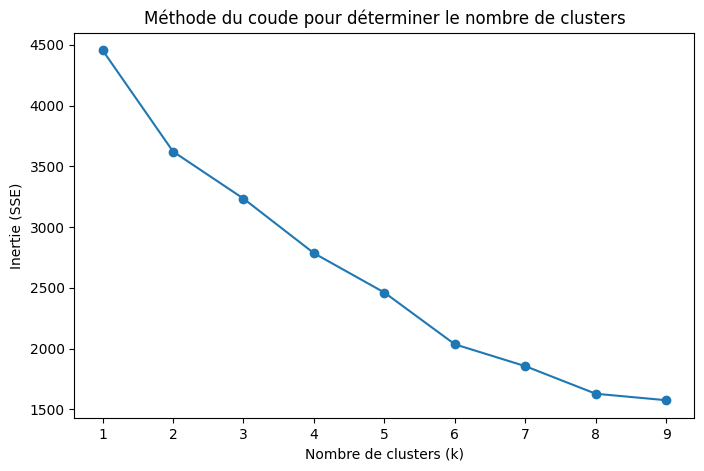

C:\Users\ADDICHANE\AppData\Local\Temp\ipykernel_36016\1473586793.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["Cluster"] = kmeans.labels_


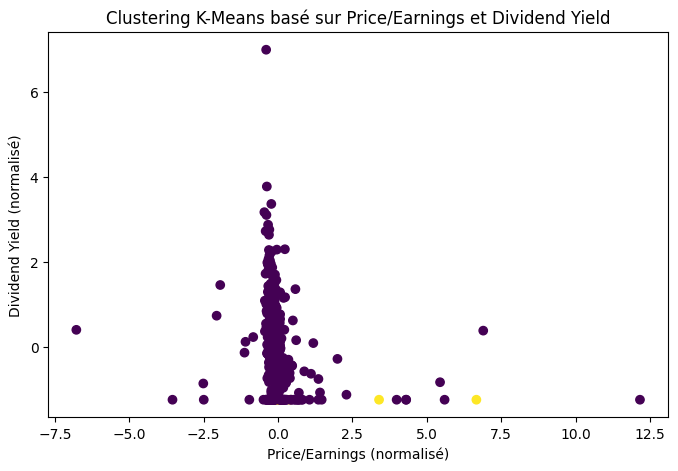

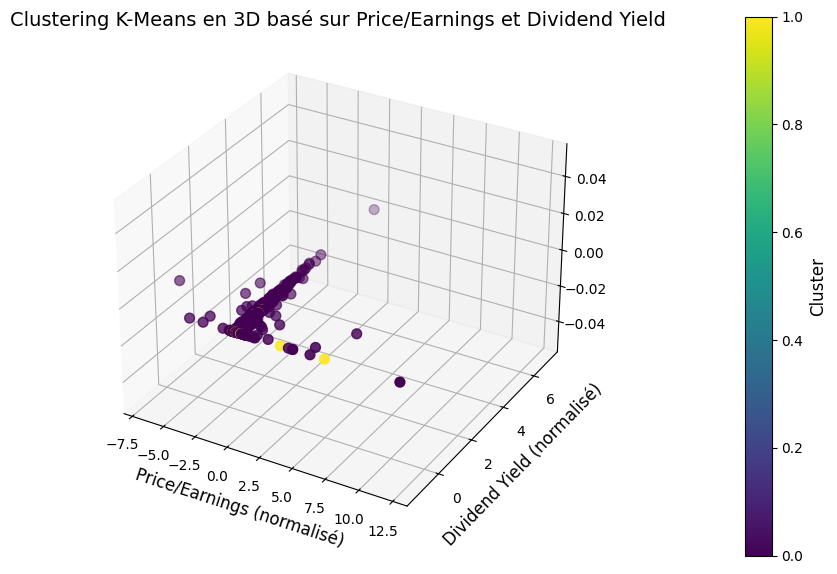

Centroides des clusters :
 [[-2.11566352e-02  1.79416164e-02 -6.76534276e-02 -9.22460059e-02
  -9.07978518e-02 -9.01602989e-02 -6.56660728e-02 -1.29378993e-02
  -1.36149937e-03]
 [ 1.02609680e+00 -8.70168397e-01  3.28119124e+00  4.47393129e+00
   4.40369581e+00  4.37277450e+00  3.18480453e+00  6.27488114e-01
   6.60327193e-02]]
Score de silhouette : 0.7458225575436647


In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# Charger les données
data = pd.read_csv('financials.csv')
data = data.dropna()  # Suppression des lignes avec des valeurs manquantes
data.isnull().sum()

data.head()

# Sélection des colonnes pertinentes pour le clustering
features = data[["Price/Earnings", "Dividend Yield", "Earnings/Share", "52 Week Low", "52 Week High",
                 "Market Cap", "EBITDA", "Price/Sales", "Price/Book"]]

# Normalisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)

# Méthode du coude pour déterminer le meilleur nombre de clusters
inertias = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)

# Afficher la courbe du coude
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title("Méthode du coude pour déterminer le nombre de clusters")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie (SSE)")
plt.show()

# Application de K-Means avec le nombre de clusters choisi (par exemple, k=2)
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)

# Ajouter les labels des clusters au DataFrame
features["Cluster"] = kmeans.labels_

# Visualisation des clusters (2D)
plt.figure(figsize=(8, 5))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans.labels_, cmap="viridis")
plt.title("Clustering K-Means basé sur Price/Earnings et Dividend Yield")
plt.xlabel("Price/Earnings (normalisé)")
plt.ylabel("Dividend Yield (normalisé)")
plt.show()

# Visualisation 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot en 3D
scatter = ax.scatter(
    data_scaled[:, 0],  # Feature 1 (Price/Earnings)
    data_scaled[:, 1],  # Feature 2 (Dividend Yield)
    c=kmeans.labels_,
    cmap="viridis",
    s=50
)

# Ajout des labels et du titre
ax.set_title("Clustering K-Means en 3D basé sur Price/Earnings et Dividend Yield", fontsize=14)
ax.set_xlabel("Price/Earnings (normalisé)", fontsize=12)
ax.set_ylabel("Dividend Yield (normalisé)", fontsize=12)

# Color bar pour les clusters
colorbar = fig.colorbar(scatter, ax=ax, pad=0.2)
colorbar.set_label("Cluster", fontsize=12)

plt.show()

# Affichage des centroïdes
print("Centroides des clusters :\n", kmeans.cluster_centers_)




In [ ]:
# Calcul du score de silhouette
silhouette = silhouette_score(data_scaled, kmeans.labels_)
print("Score de silhouette :", silhouette)